In [3]:
import pandas as pd
import numpy as np
df=pd.read_csv("extracted_features_charrec_dense7.csv")
print(df)
df.shape


              0         1          2    3          4          5          6  \
0     27.630783  0.000000  51.067493  0.0  26.302004   0.000000   0.000000   
1     41.934185  0.000000  57.616398  0.0  40.345722   0.000000   0.000000   
2     59.681458  0.000000  35.450397  0.0  51.084698   0.000000   0.000000   
3     25.652845  0.000000  42.711246  0.0  26.391441   0.000000   0.000000   
4     51.862490  0.000000  25.455917  0.0  48.505250   0.000000   0.000000   
...         ...       ...        ...  ...        ...        ...        ...   
6652   0.000000  8.917019  12.606703  0.0   0.000000  23.875010   0.000000   
6653  12.088920  3.646342  28.106102  0.0   0.000000   0.000000   0.000000   
6654   0.000000  0.000000  53.899130  0.0   0.000000   0.000000  12.079654   
6655   0.000000  0.000000  37.811558  0.0   0.000000   0.000000   8.555406   
6656   0.000000  0.000000  29.105694  0.0   0.000000   8.669491  20.568624   

        7    8         9  ...         55         56   57       

(6657, 65)

In [4]:
np.dot(df["0"],df["45"])

113.88492503658134

In [5]:
np.linalg.norm(df["0"])

2435.502005891182

In [6]:
class_A_data = df[df['class_name'] == 3334]
class_B_data = df[df['class_name'] == 3335]


In [7]:
import numpy as np

centroid_A = np.mean(class_A_data, axis=0)
centroid_B = np.mean(class_B_data, axis=0)


In [8]:
centroid_A

0               31.041534
1                0.309216
2                9.149055
3                0.007348
4               37.098322
                 ...     
60               0.015213
61               0.098929
62              16.328774
63               0.000000
class_name    3334.000000
Length: 65, dtype: float64

In [9]:
centroid_B

0               33.954744
1                7.803311
2                0.929065
3                0.000000
4               48.753925
                 ...     
60               0.035407
61               5.166118
62              24.849326
63               0.000000
class_name    3335.000000
Length: 65, dtype: float64

In [10]:
centroid_A = np.std(class_A_data,axis=0)
centroid_B = np.std(class_B_data,axis=0)

In [11]:
centroid_A
centroid_B

0             14.117133
1              4.608137
2              4.158898
3              0.000000
4             21.907818
                ...    
60             0.435084
61             6.307505
62            10.803543
63             0.000000
class_name     0.000000
Length: 65, dtype: float64

In [12]:
x = np.linalg.norm(centroid_A - centroid_B)
x

32.2593893920739

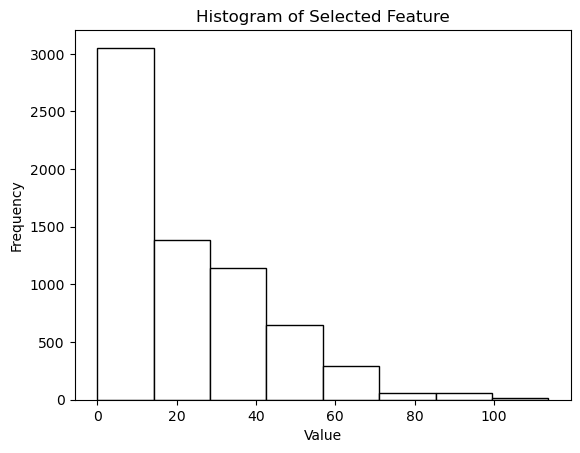

In [13]:

import numpy as np
import matplotlib.pyplot as plt

selected_feature = df['0']
num_bins =8
hist, bins = np.histogram(selected_feature, bins=num_bins)

plt.hist(selected_feature, bins=num_bins,  color='w', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Selected Feature')
plt.show()


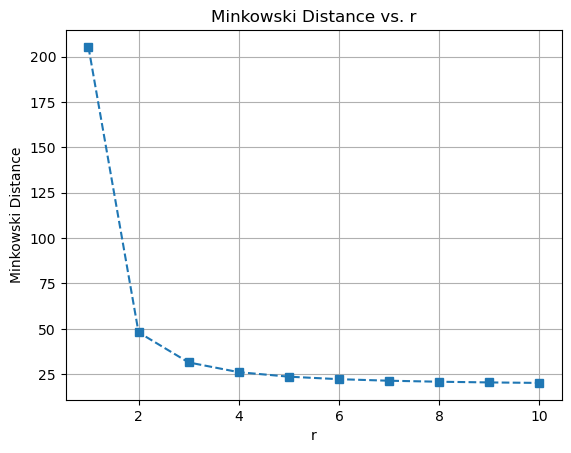

In [14]:
import numpy as np
import matplotlib.pyplot as plt
vector1 = df.iloc[0, :]  
vector2 = df.iloc[1, :]  
distances = []
r_values = list(range(1, 11))
for r in r_values:
    distance = np.power(np.sum(np.abs(vector1 - vector2) ** r), 1/r)
    distances.append(distance)

plt.plot(r_values, distances, marker='s', linestyle='--')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance vs. r')
plt.grid(True)
plt.show()


In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [16]:
y_test

6083    3383
788     3343
3998    3365
5567    3379
1097    3349
        ... 
1832    3354
1492    3351
2549    3359
4467    3370
2605    3359
Name: class_name, Length: 1998, dtype: int64

In [17]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
#understanding use of neigh.fit it is used to understand the relationship between features and classlabels
# and also k=3 means to set the no of neighbours to validate

KNeighborsClassifier(n_neighbors=3)

In [18]:
#neigh.score(X_test,y_test)
# mowa idhi sir ni doubt adugu idhi work kavadam la 

In [19]:
#predictions = neigh.predict(X_test)

In [65]:
y_train_new = np.argmax(y_train, axis=0)
y_train_new
y_train_new = np.around(y_train_new)
y_train_new

25

In [66]:
y_test_new = np.argmax(y_test, axis=0)
y_test_new
y_test_new = np.around(y_test_new)
y_test_new

2

In [67]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
confusion_matrix_train = confusion_matrix(X_train, y_train_new)
confusion_matrix_test = confusion_matrix(X_test, y_test_new)
confusion_matrix_train


InvalidParameterError: The 'y_pred' parameter of confusion_matrix must be an array-like. Got 25 instead.

In [50]:
precision_train = precision_score(X_train, y_train)
recall_train = recall_score(X_train, y_train)
f1_score_train = f1_score(X_train, y_train)

ValueError: Classification metrics can't handle a mix of continuous-multioutput and multiclass targets

In [ ]:
precision_test = precision_score(y_true_test, y_pred_test)
recall_test = recall_score(y_true_test, y_pred_test)
f1_score_test = f1_score(y_true_test, y_pred_test)

In [27]:
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,class_name
0,27.630783,0.000000,51.067493,0.0,26.302004,0.000000,0.000000,0.0,0.0,0.000000,...,35.563477,8.822042,0.0,18.269510,82.596970,0.000000,0.000000,1.751286,0.0,3333
1,41.934185,0.000000,57.616398,0.0,40.345722,0.000000,0.000000,0.0,0.0,0.000000,...,33.432617,22.573324,0.0,25.266916,71.188900,0.000000,0.000000,0.000000,0.0,3333
2,59.681458,0.000000,35.450397,0.0,51.084698,0.000000,0.000000,0.0,0.0,4.531399,...,17.747238,22.295591,0.0,9.600313,39.380276,0.000000,0.000000,13.358544,0.0,3333
3,25.652845,0.000000,42.711246,0.0,26.391441,0.000000,0.000000,0.0,0.0,0.000000,...,25.998358,12.029038,0.0,19.127953,60.226376,0.000000,0.000000,0.000000,0.0,3333
4,51.862490,0.000000,25.455917,0.0,48.505250,0.000000,0.000000,0.0,0.0,0.000000,...,27.024067,1.758605,0.0,17.696215,64.634834,0.000000,0.000000,9.861172,0.0,3333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6652,0.000000,8.917019,12.606703,0.0,0.000000,23.875010,0.000000,0.0,0.0,9.403310,...,0.000000,9.477231,0.0,0.000000,46.723995,0.000000,20.901190,7.003646,0.0,3454
6653,12.088920,3.646342,28.106102,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,38.677414,0.000000,1.824834,7.562943,0.0,3454
6654,0.000000,0.000000,53.899130,0.0,0.000000,0.000000,12.079654,0.0,0.0,0.000000,...,12.388772,58.245360,0.0,0.000000,47.787598,5.880453,0.000000,3.556168,0.0,3454
6655,0.000000,0.000000,37.811558,0.0,0.000000,0.000000,8.555406,0.0,0.0,0.000000,...,7.663426,23.674717,0.0,0.000000,53.260387,3.350826,0.000000,8.673196,0.0,3454


In [28]:
df.dropna()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,class_name
0,27.630783,0.000000,51.067493,0.0,26.302004,0.000000,0.000000,0.0,0.0,0.000000,...,35.563477,8.822042,0.0,18.269510,82.596970,0.000000,0.000000,1.751286,0.0,3333
1,41.934185,0.000000,57.616398,0.0,40.345722,0.000000,0.000000,0.0,0.0,0.000000,...,33.432617,22.573324,0.0,25.266916,71.188900,0.000000,0.000000,0.000000,0.0,3333
2,59.681458,0.000000,35.450397,0.0,51.084698,0.000000,0.000000,0.0,0.0,4.531399,...,17.747238,22.295591,0.0,9.600313,39.380276,0.000000,0.000000,13.358544,0.0,3333
3,25.652845,0.000000,42.711246,0.0,26.391441,0.000000,0.000000,0.0,0.0,0.000000,...,25.998358,12.029038,0.0,19.127953,60.226376,0.000000,0.000000,0.000000,0.0,3333
4,51.862490,0.000000,25.455917,0.0,48.505250,0.000000,0.000000,0.0,0.0,0.000000,...,27.024067,1.758605,0.0,17.696215,64.634834,0.000000,0.000000,9.861172,0.0,3333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6652,0.000000,8.917019,12.606703,0.0,0.000000,23.875010,0.000000,0.0,0.0,9.403310,...,0.000000,9.477231,0.0,0.000000,46.723995,0.000000,20.901190,7.003646,0.0,3454
6653,12.088920,3.646342,28.106102,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,38.677414,0.000000,1.824834,7.562943,0.0,3454
6654,0.000000,0.000000,53.899130,0.0,0.000000,0.000000,12.079654,0.0,0.0,0.000000,...,12.388772,58.245360,0.0,0.000000,47.787598,5.880453,0.000000,3.556168,0.0,3454
6655,0.000000,0.000000,37.811558,0.0,0.000000,0.000000,8.555406,0.0,0.0,0.000000,...,7.663426,23.674717,0.0,0.000000,53.260387,3.350826,0.000000,8.673196,0.0,3454


In [31]:
print(type(y_train))

<class 'pandas.core.series.Series'>


In [32]:
print(type(y_test))

<class 'pandas.core.series.Series'>
